#✅ Step-by-Step SARIMA Practical

In [ ]:

# ---------------------------------------------
# 📦 Step 1: Install required libraries (for Google Colab)
# ---------------------------------------------
!pip install statsmodels --quiet
!pip install pmdarima --quiet

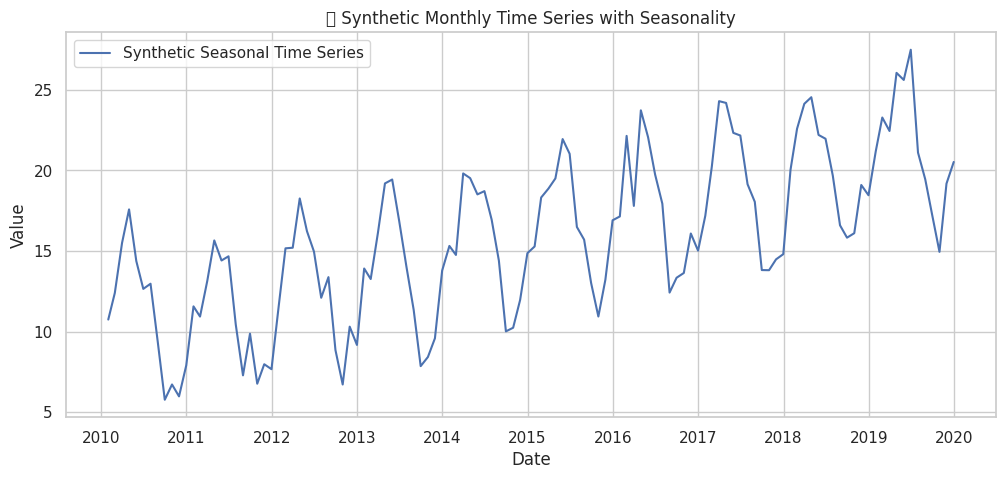

In [26]:


# ---------------------------------------------
# 📚 Step 2: Import necessary libraries
# ---------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# ---------------------------------------------
# 🔧 Step 3: Generate Synthetic Seasonal Time Series Data
# ---------------------------------------------
np.random.seed(42)

# Create a seasonal signal: sine wave with noise
n = 120  # 10 years of monthly data
time = np.arange(n)
seasonal = 10 + 5 * np.sin(2 * np.pi * time / 12)  # 12-month seasonality
trend = 0.1 * time  # slight upward trend
noise = np.random.normal(0, 1.5, n)

# Combine trend, seasonality, and noise
data = seasonal + trend + noise

# Convert to DataFrame with monthly dates
df = pd.DataFrame({'Value': data})
df.index = pd.date_range(start='2010-01-01', periods=n, freq='M')

# ---------------------------------------------
# 📈 Step 4: Visualize the synthetic data
# ---------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df['Value'], label='Synthetic Seasonal Time Series')
plt.title('📊 Synthetic Monthly Time Series with Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



In [27]:
# ---------------------------------------------
# ✂️ Step 5: Train-Test Split
# ---------------------------------------------
train = df.iloc[:100]
test = df.iloc[100:]

# ---------------------------------------------
# 🧠 Step 6: Fit SARIMA Model using SARIMAX
# SARIMA(p,d,q)(P,D,Q,s) where s = season length = 12 for monthly
# Try: SARIMA(1,1,1)(1,1,1,12)
# ---------------------------------------------
model = SARIMAX(train,
                order=(1,1,1),         # non-seasonal part
                seasonal_order=(1,1,1,12),  # seasonal part
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)

# ---------------------------------------------
# 🔮 Step 7: Forecast future values
# ---------------------------------------------
forecast = sarima_model.forecast(steps=len(test))

# ---------------------------------------------
# 📊 Step 8: Evaluate forecast
# ---------------------------------------------
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("📉 Forecast Evaluation Metrics:")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")



📉 Forecast Evaluation Metrics:
MAE  : 1.036
MSE  : 1.659
RMSE : 1.288


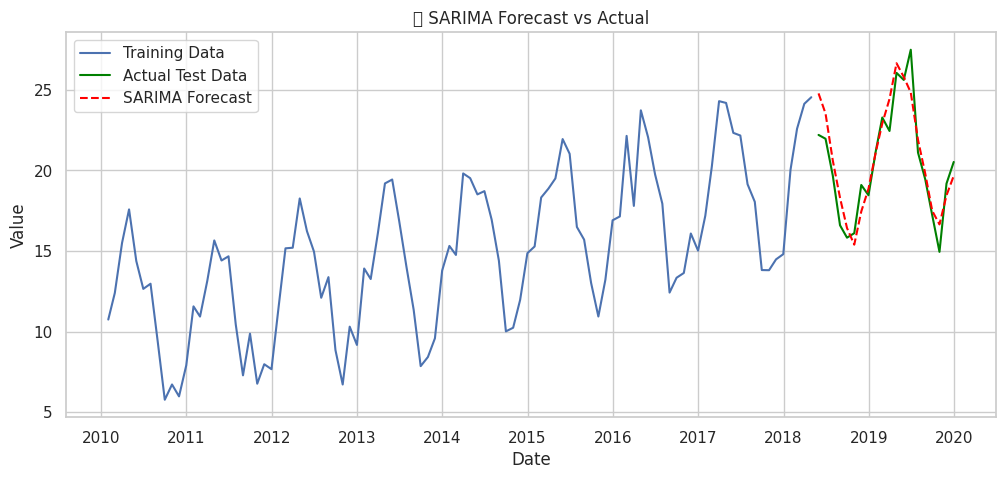

In [28]:
# ---------------------------------------------
# 📉 Step 9: Plot forecast vs actual
# ---------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Value'], label='Training Data')
plt.plot(test.index, test['Value'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red', linestyle='--')
plt.title('🔮 SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()




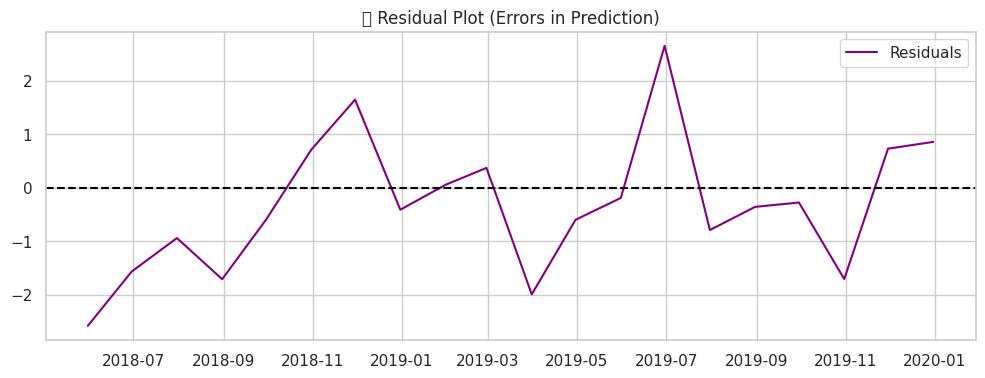

In [29]:
# ---------------------------------------------
# 🧾 Step 10: Residual Analysis
# ---------------------------------------------
residuals = test['Value'] - forecast

plt.figure(figsize=(12, 4))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, linestyle='--', color='black')
plt.title('📉 Residual Plot (Errors in Prediction)')
plt.legend()
plt.show()



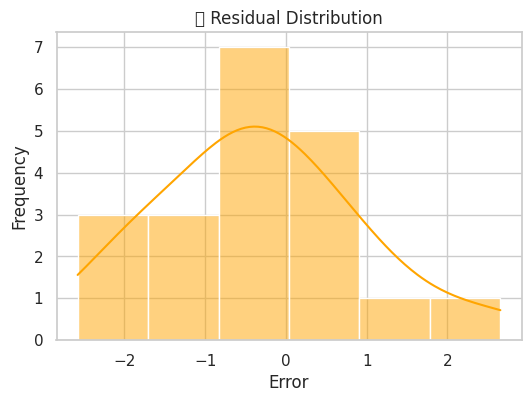

In [30]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('📊 Residual Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

#🔎 What students learn:

How to generate synthetic seasonal time series data

Understand SARIMA model components: (p,d,q)(P,D,Q,s)

Fit SARIMA using SARIMAX() from statsmodels

Visualize predictions and analyze residuals

Compare metrics like MAE, RMSE, MSE